In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [76]:
df1 = pd.read_csv('Datasets/mobile-price-classification/train.csv')
df1.head(5)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores     ...       px_height  px_width   ram  sc_h  sc_w  \
0        188        2     ...              20       756  2549     9     7   
1        136        3     ...             905      1988  2631    17     3   
2        145        5     ...            1263      1716  2603    11     2   
3        131        6     ...            1216      1786  2769    16     8   
4        141        2     ...            1208      1212  1411     8     2   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

In [77]:
X = df1.iloc[:,:20].values
y = df1.iloc[:,20:21].values

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [79]:
st = StandardScaler()

In [80]:
X = st.fit_transform(X)
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [81]:
ohe = OneHotEncoder()

In [82]:
y = ohe.fit_transform(y).toarray()

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [85]:
model = Sequential()
model.add(Dense(16,input_dim = 20,activation = 'relu'))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(4,activation = 'softmax'))

In [86]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

In [87]:
history = model.fit(X_train,y_train,epochs = 100, batch_size=64)

Epoch 1/100
1600/1600 [==============================] - 1s 661us/step - loss: 1.6311 - acc: 0.2050
Epoch 2/100
1600/1600 [==============================] - ETA: 0s - loss: 1.5051 - acc: 0.197 - 0s 63us/step - loss: 1.4834 - acc: 0.2137
Epoch 3/100
1600/1600 [==============================] - 0s 59us/step - loss: 1.4137 - acc: 0.2656
Epoch 4/100
1600/1600 [==============================] - 0s 133us/step - loss: 1.3659 - acc: 0.3194
Epoch 5/100
1600/1600 [==============================] - 0s 57us/step - loss: 1.3199 - acc: 0.3656
Epoch 6/100
1600/1600 [==============================] - 0s 63us/step - loss: 1.2703 - acc: 0.4094
Epoch 7/100
1600/1600 [==============================] - 0s 62us/step - loss: 1.2124 - acc: 0.4531
Epoch 8/100
1600/1600 [==============================] - 0s 59us/step - loss: 1.1463 - acc: 0.5019
Epoch 9/100
1600/1600 [==============================] - 0s 62us/step - loss: 1.0763 - acc: 0.5444
Epoch 10/100
1600/1600 [==============================] - 0s 59us/ste

1600/1600 [==============================] - 0s 96us/step - loss: 0.0607 - acc: 0.9888
Epoch 83/100
1600/1600 [==============================] - 0s 75us/step - loss: 0.0598 - acc: 0.9906
Epoch 84/100
1600/1600 [==============================] - 0s 60us/step - loss: 0.0601 - acc: 0.9894
Epoch 85/100
1600/1600 [==============================] - 0s 61us/step - loss: 0.0562 - acc: 0.9919
Epoch 86/100
1600/1600 [==============================] - 0s 60us/step - loss: 0.0556 - acc: 0.9937
Epoch 87/100
1600/1600 [==============================] - 0s 60us/step - loss: 0.0544 - acc: 0.9931
Epoch 88/100
1600/1600 [==============================] - 0s 57us/step - loss: 0.0534 - acc: 0.9919
Epoch 89/100
1600/1600 [==============================] - 0s 65us/step - loss: 0.0527 - acc: 0.9937
Epoch 90/100
1600/1600 [==============================] - 0s 67us/step - loss: 0.0518 - acc: 0.9931
Epoch 91/100
1600/1600 [==============================] - 0s 94us/step - loss: 0.0508 - acc: 0.9950
Epoch 92/100


In [88]:
y_pred = model.predict(X_test)

pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))   

In [89]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100, "%")

Accuracy is: 92.5 %


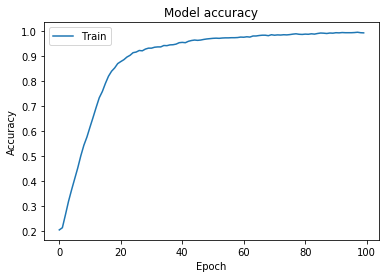

In [90]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

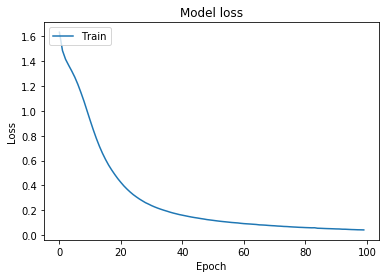

In [91]:
plt.plot(history.history['loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train'], loc='upper left') 
plt.show()